In [1]:
import pyshtools as pysh
import matplotlib.pyplot as plt

from cartopy import crs as ccrs
import pygmt
from palettable import scientific as scm

%config InlineBackend.figure_format = 'retina'  # if you are not using a retina display, comment this line!
pysh.utils.figstyle(rel_width=0.75)  # set some matplotlib parameters for better looking plots


In [2]:
shape = pysh.datasets.Moon.MoonTopo2600p()

shape?
Type:           SHRealCoeffs
String form:   
kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 2600
error_kind = None
header = None
header2 = None
name = 'MoonTopo2600p'
units = 'm'
File:           ~/anaconda3/envs/craters/lib/python3.9/site-packages/pyshtools/shclasses/shcoeffs.py
Docstring:      Real Spherical Harmonics Coefficient class.
Init docstring: Initialize Real SH Coefficients.

In [3]:
shape2 = pysh.SHGravCoeffs.from_shape(shape,rho=2600. , gm = 4902.8001224453, lmax=660)

In [4]:
shape2.r0 = 1738.0


shape2?
Type:           SHGravRealCoeffs
String form:   
kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 660
GM (m3 / s2) = 4902.8001224453
r0 (m) = 1738.0
Omega (rad / s) = None
error_kind = None
header = None
header2 = None
name = None
epoch = None
File:           ~/anaconda3/envs/craters/lib/python3.9/site-packages/pyshtools/shclasses/shgravcoeffs.py
Docstring:      Real spherical harmonic coefficient class for the gravitational potential.
Init docstring: Initialize real gravitational potential coefficients class.

In [5]:
#shape2.r0 = 1738.0

In [6]:
i = 1
j = 0
for i in range(18):
    for j in range(18):
        shape2.set_coeffs(0,i,j)
i =1
j = 0
for i in range(18):
    for j in range(0,-18,-1):
        shape2.set_coeffs(0,i,j)

In [7]:
grid = shape2.expand()

In [8]:
shape2?

In [9]:
total_shape = grid.total

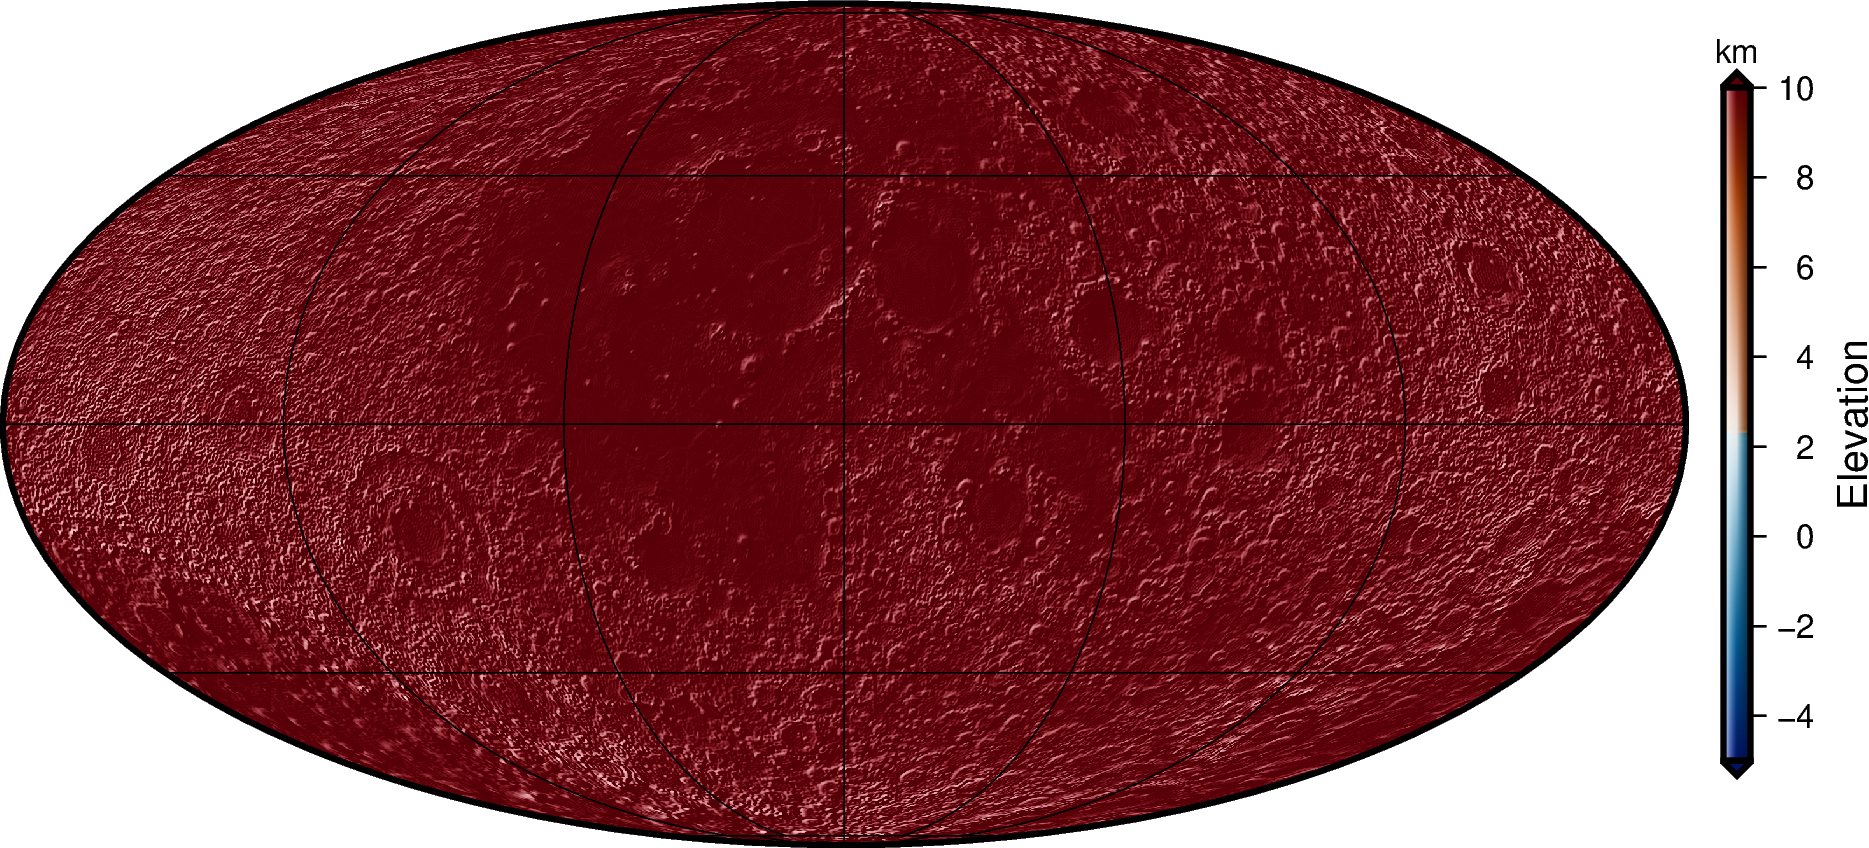

In [10]:
fig = total_shape.plotgmt(projection='mollweide',
                   central_longitude=0.,
                   cmap='vik',
                   cmap_limits=[-5, 10],
                   tick_interval=None,
                   colorbar='right',
                   cb_label='Elevation',
                   cb_ylabel='km',
                   cb_triangles='both',
                   cb_tick_interval=2,
                   grid=[60, 45],
                   shading=True)
fig.show()

In [11]:
#bouguer = clm - bc

In [12]:
clm=pysh.SHGravCoeffs.from_file('gggrx_1200a_sha.tab', format = 'shtools', lmax = 660)

In [13]:
i = 1
j = 0
for i in range(18):
    for j in range(18):
        clm.set_coeffs(0,i,j)
i =1
j = 0
for i in range(18):
    for j in range(0,-18,-1):
        clm.set_coeffs(0,i,j)

In [14]:
grid2 = clm.expand()

In [15]:
clm_total= grid2.total

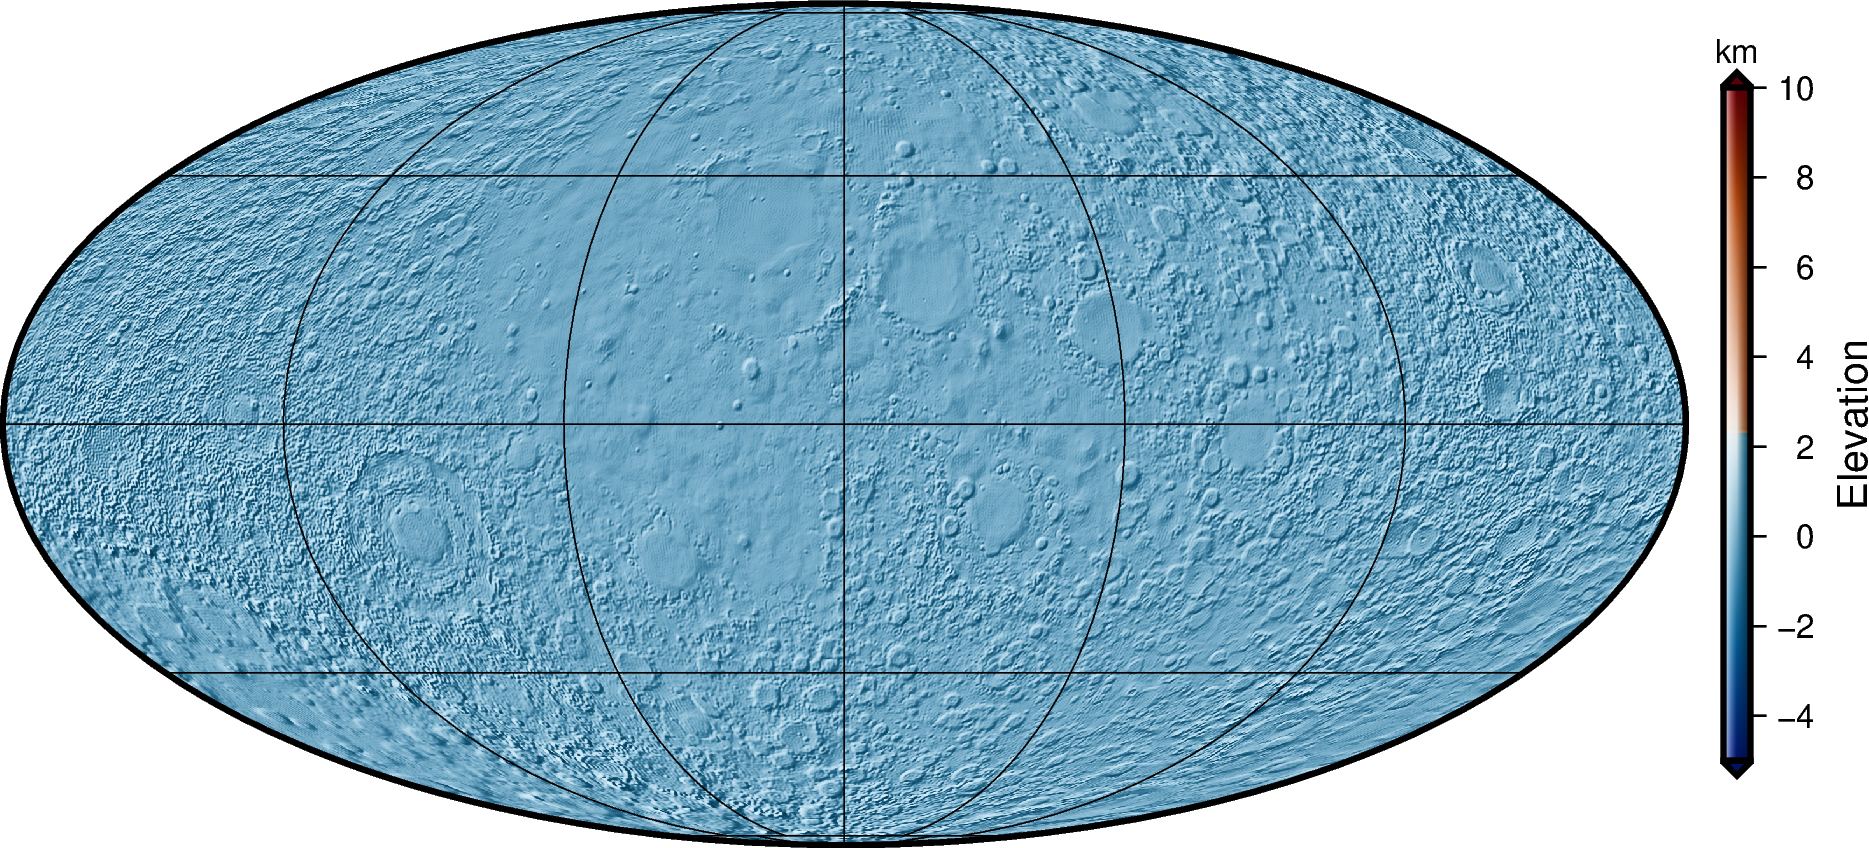

In [16]:
fig3 = clm_total.plotgmt(projection='mollweide',
                   central_longitude=0.,
                   cmap='vik',
                   cmap_limits=[-5, 10],
                   tick_interval=None,
                   colorbar='right',
                   cb_label='Elevation',
                   cb_ylabel='km',
                   cb_triangles='both',
                   cb_tick_interval=2,
                   grid=[60, 45],
                   shading=True)
fig3.show()

In [17]:
bc = clm_total - total_shape

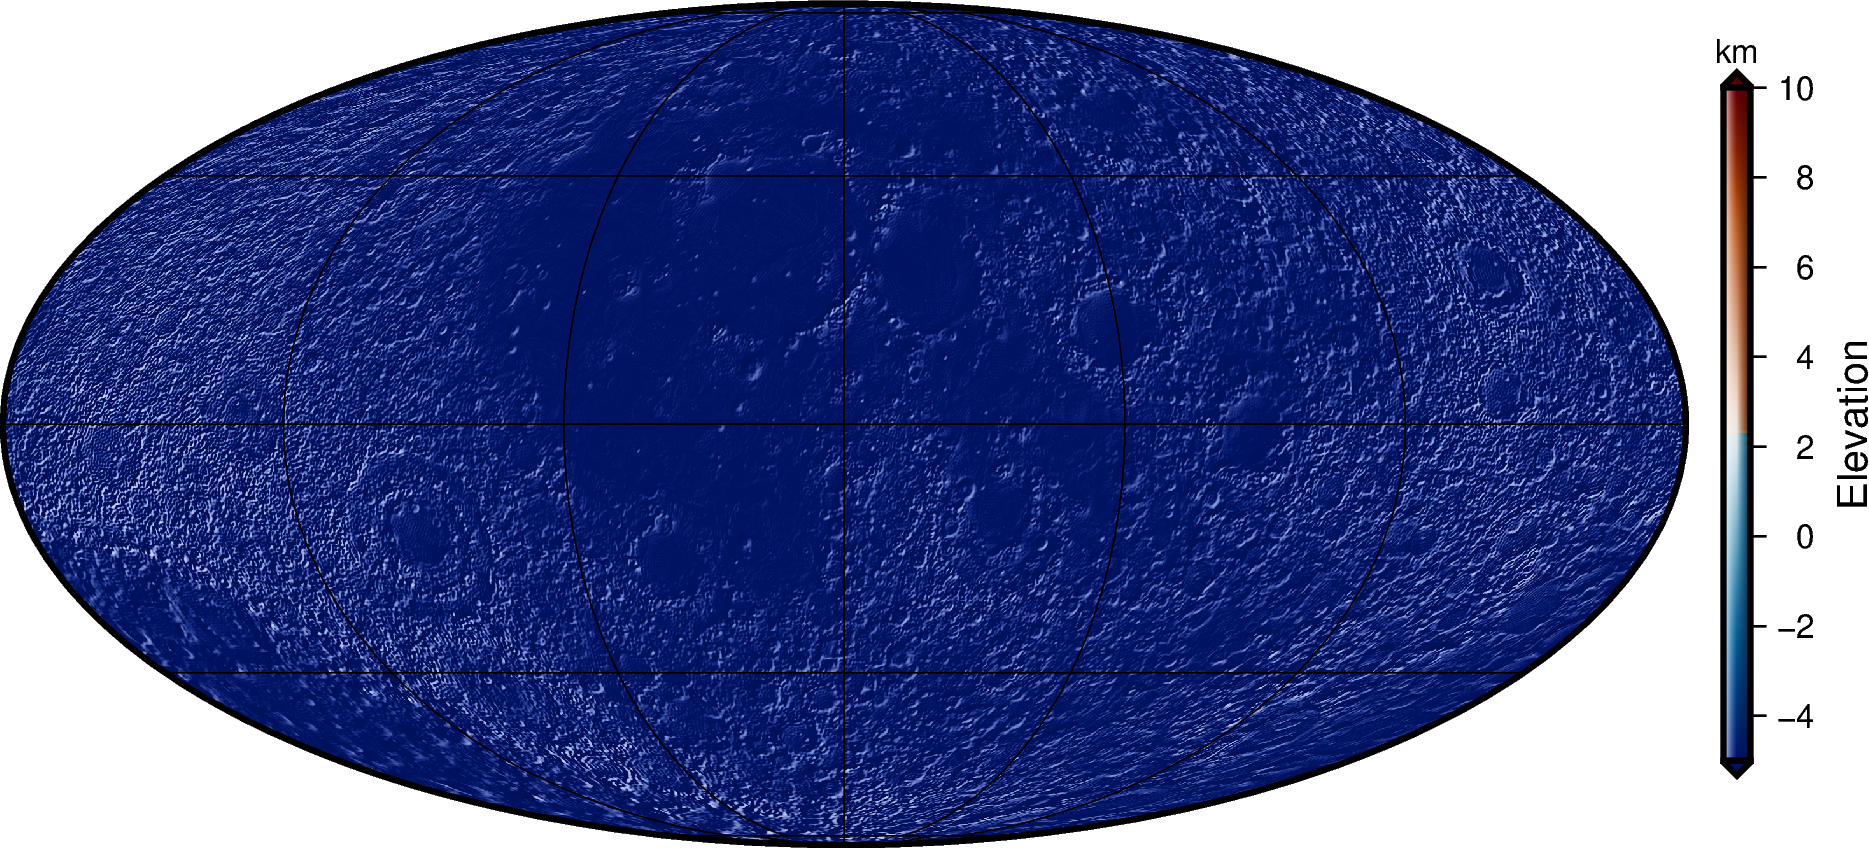

In [18]:
fig2 = bc.plotgmt(projection='mollweide',
                   central_longitude=0.,
                   cmap='vik',
                   cmap_limits=[-5, 10],
                   tick_interval=None,
                   colorbar='right',
                   cb_label='Elevation',
                   cb_ylabel='km',
                   cb_triangles='both',
                   cb_tick_interval=2,
                   grid=[60, 45],
                   shading=True)
fig2.show()